In [1]:
include("ct_utils.jl")
using .CTUtils
using DataFrames
using CSV 
using PyPlot

In [ ]:
df_ct = ct_to_df("../si-topcon-dark.csv")
df_scaps = scaps_to_df("../si-topcon-dark.eb")

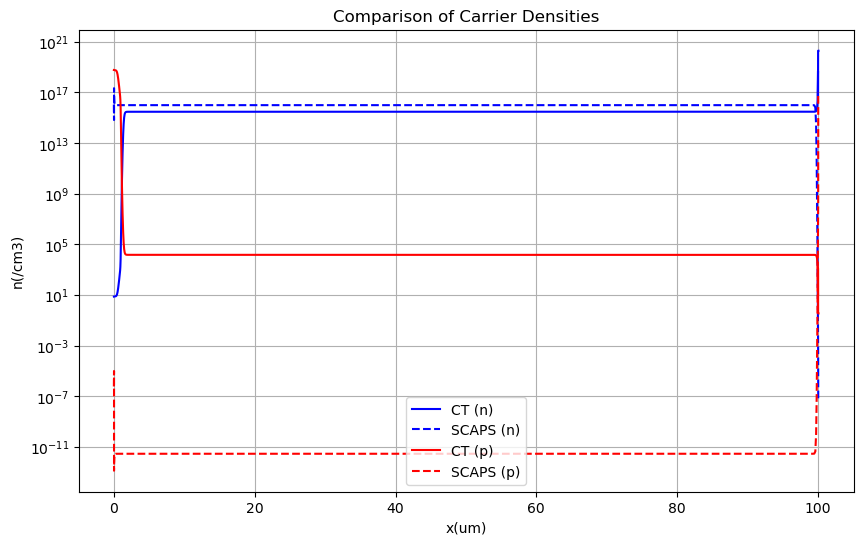

In [3]:
compare_densities(df_ct, df_scaps)
display(gcf())